# **Welcome to Logistic Regression Assignment Quiz**

In [63]:
# import the requirred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

EDA

- -> null values
- -> duplicates values
- -> unwanted data or data columns
- -> outliers (find and remove)
- -> label encoding
- -> Feature/column selection
- -> building model


In [64]:
# Import the required dataset
df = pd.read_csv(r'D:\Intellipaat\Datasets\Census_income.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


COLUMNS DETAILS
1. **Age**	              :-    Age of the individual <br/> <br/>
2. **Workclass**	      :-    department of the working individual <br/> <br/>
3. **fnlwgt**	          :-    Final weight of the individual <br/> <br/>
4. **education**	      :-    The education degree of the individual <br/> <br/>
5. **education-num**	  :-    Number of years of education <br/> <br/>
6. **marital-status**     :-    Marital status of the individual <br/> <br/>
7. **occupation**	      :-    Occupation of the individual <br/> <br/>
8. **relationship**       :-    Relation value <br/> <br/>
9. **race**	              :-    Ethnicity of the individual <br/> <br/>
10. **sex**	              :-    Female, Male <br/> <br/>
11. **capital-gain**	  :-    capital gain of the individual <br/> <br/>
12. **capital-loss**	  :-    capital loss of the individual <br/> <br/>
13. **hours-per-week**	  :-    number of working hours <br/> <br/>
14. **native-country**	  :-    The native country of the individual <br/> <br/>
15. **Annual-Income**     :-    Annual income either >50K or <=50K 

## Exploratory Data Analysis

In [65]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [66]:
# Fill the '?' with NaN 
df.replace('?', np.nan, inplace=True)

In [67]:
# Check for the null value in dataframe
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [68]:
# Remove the null values from df
df.dropna(inplace=True)

In [69]:
# Check for the duplicate value in the dataframe
df.duplicated().sum()

23

In [70]:
# Drop duplicates form the dataframe
df.drop_duplicates(inplace=True) 

In [71]:
# Check whether duplicates removed or not
df.duplicated().sum()

0

In [72]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


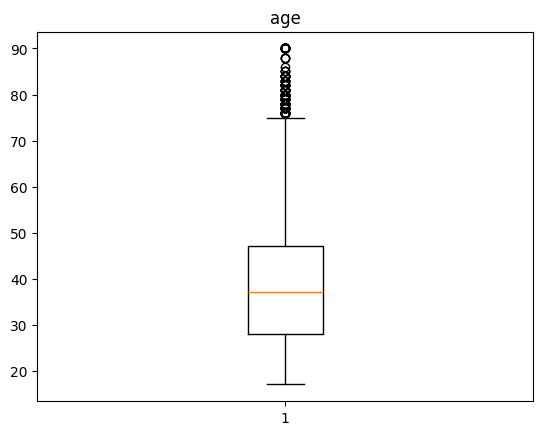

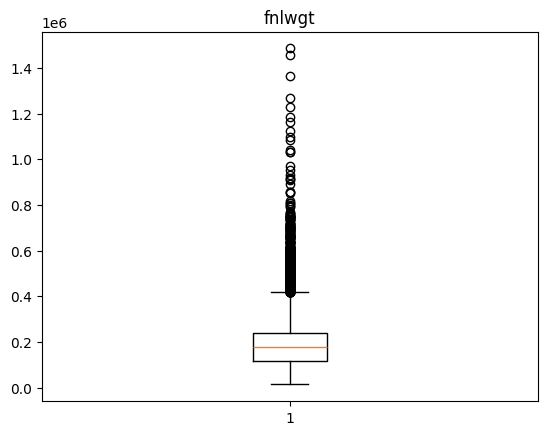

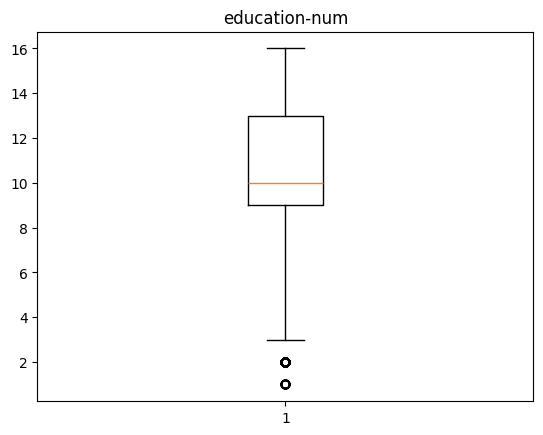

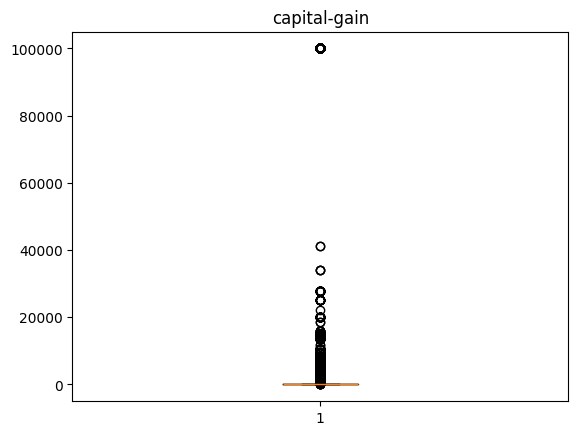

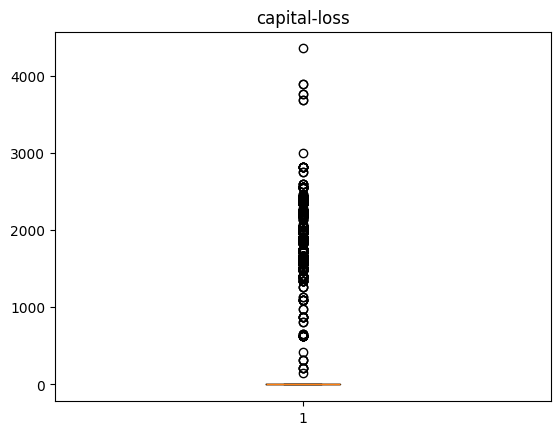

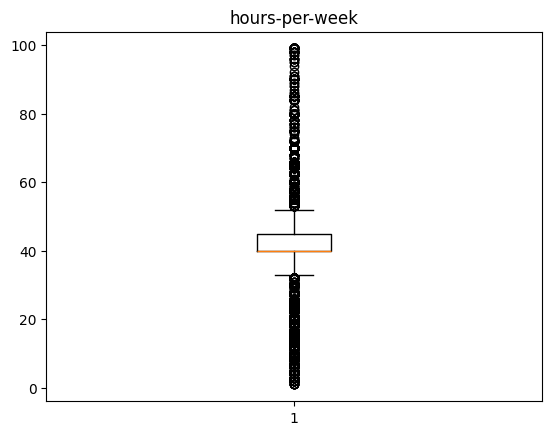

In [73]:
# Check for the outliers (boxplot)
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

**Inference** :- <br/>
Here 'capital_loss' & 'capital_gain' are not taken as outliers <br/>
due to some values has taken more than 90-95 % of data, <br/>
and also that column whose dtype is 'object'

In [74]:
# Create an array of outliers containing column names 
outliers_column = ['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [75]:
# Remove outliers from the dataframe
for i in outliers_column:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

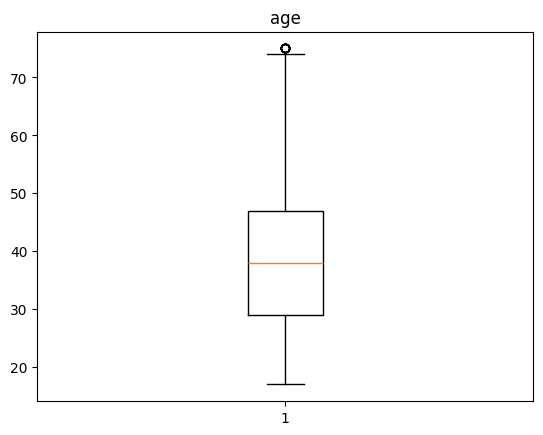

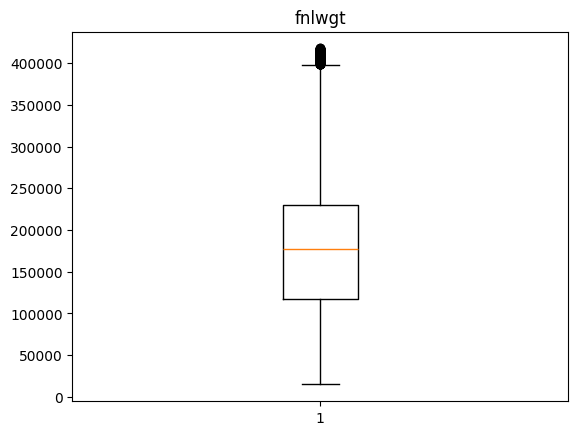

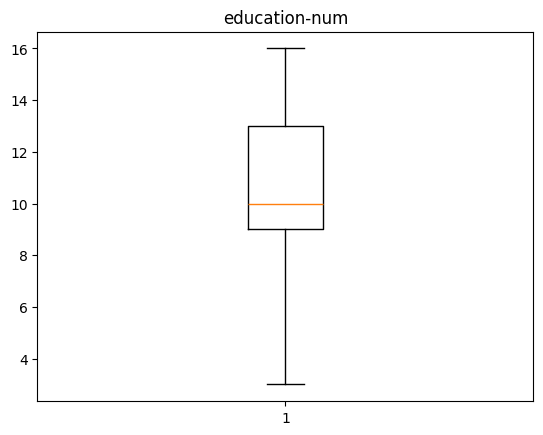

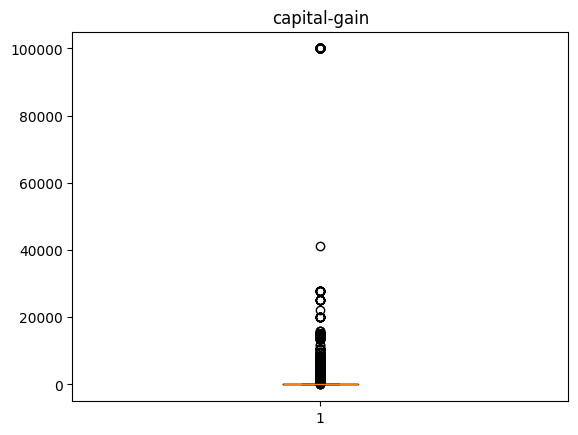

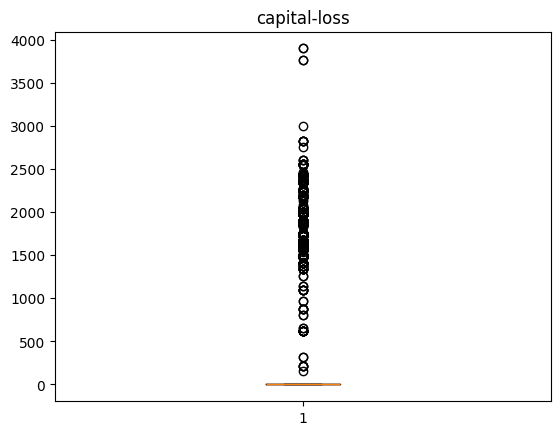

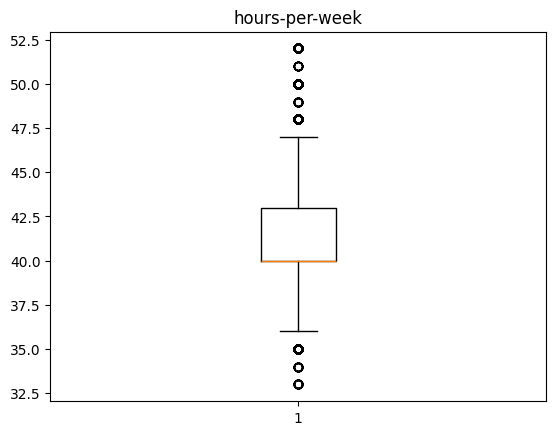

In [76]:
# Check whether the outliers removed or not
for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

**Note** :- <br/>
After removing extreme far values from the range, the values which were nearby limits became new outliers <br/>
but they are actually not. They don't affect our target variables so no need to worry about that values.

In [77]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [78]:
# import label encoder class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [79]:
# Change the dtype of 'object' column as 'integer'
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [80]:
# Check whether the dtypes of respective columns changed or not
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
annual_income     int32
dtype: object

In [81]:
# Check dataframe
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


In [82]:
# Import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

Now, <br/>
-> Remove the columns which are showing high vif  
-> keep doing this process untill the vif of all column comes below 5 or close to 5(in exception)

In [83]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,12.044357
1,capital-gain,1.041915
2,capital-loss,1.063243
3,education,10.613509
4,education-num,21.409792
5,fnlwgt,5.156834
6,hours-per-week,62.576105
7,marital-status,3.923992
8,native-country,33.620845
9,occupation,3.073111


In [84]:
df.drop(columns=['hours-per-week'], inplace=True)

In [85]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,10.930475
1,capital-gain,1.041417
2,capital-loss,1.063149
3,education,10.500616
4,education-num,19.473926
5,fnlwgt,4.999922
6,marital-status,3.826628
7,native-country,28.860632
8,occupation,3.048149
9,race,18.118613


In [86]:
df.drop(columns=['native-country'], inplace=True)

In [87]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,10.099023
1,capital-gain,1.040168
2,capital-loss,1.063012
3,education,10.199444
4,education-num,18.414953
5,fnlwgt,4.960937
6,marital-status,3.728532
7,occupation,3.040434
8,race,15.384891
9,relationship,2.411903


In [88]:
df.drop(columns=['education-num'], inplace=True)

In [89]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,9.518317
1,capital-gain,1.033314
2,capital-loss,1.058552
3,education,8.233870
4,fnlwgt,4.921335
5,marital-status,3.655425
6,occupation,2.939325
7,race,14.399405
8,relationship,2.399189
9,sex,4.573511


In [90]:
df.drop(columns=['race'], inplace=True)

In [91]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,age,8.222586
1,capital-gain,1.033058
2,capital-loss,1.058360
3,education,7.589170
4,fnlwgt,4.765192
5,marital-status,3.565859
6,occupation,2.909466
7,relationship,2.338058
8,sex,4.301414
9,workclass,5.684218


In [92]:
df.drop(columns=['age'], inplace=True)

In [93]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,capital-gain,1.028775
1,capital-loss,1.054411
2,education,6.592310
3,fnlwgt,4.586520
4,marital-status,3.561742
5,occupation,2.841485
6,relationship,2.318466
7,sex,4.093514
8,workclass,5.171979


In [94]:
df.drop(columns=['education'], inplace=True)

In [95]:
c = []
for col in df.columns.difference(['annual_income']):
    c.append(col)

x = df[c]
vifdata = pd.DataFrame()
vifdata['features'] = x.columns
vifdata['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdata

,features,vif
0,capital-gain,1.027523
1,capital-loss,1.052303
2,fnlwgt,4.303015
3,marital-status,3.455856
4,occupation,2.794028
5,relationship,2.166527
6,sex,3.790381
7,workclass,4.671191


In [96]:
# Check whether the target variable is balanced or not 
df['annual_income'].value_counts()

annual_income
0    15709
1     5608
Name: count, dtype: int64

In [97]:
# # create data frame for independent variables & dependent variables
X = pd.DataFrame(x)                         # independent variable
y = pd.DataFrame(df['annual_income'])       # dependent variable
X.head()

,capital-gain,capital-loss,fnlwgt,marital-status,occupation,relationship,sex,workclass
0,2174,0,77516,4,0,1,1,5
2,0,0,215646,0,5,1,1,2
3,0,0,234721,2,5,0,1,2
4,0,0,338409,2,9,5,0,2
5,0,0,284582,2,3,5,0,2


In [98]:
y.head()

,annual_income
0,0
2,0
3,0
4,0
5,0


In [99]:
# Import the train test split function, get train & test data from it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [100]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17053, 8)
(4264, 8)
(17053, 1)
(4264, 1)


In [101]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [102]:
# Transform data using standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [103]:
# import the logistics regression class
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()                # Instance of LR class

In [104]:
# Training the model / fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [105]:
# intercept
model.intercept_            # Beta 0

array([-1.09453166])

In [106]:
# coefficient
model.coef_                 # Beta 0, 1, 2, 3, ...

array([[ 2.29612519,  0.28713213, -0.01007983, -0.38542381,  0.10372138,
        -0.39264863,  0.32624583, -0.057049  ]])

In [107]:
# Predict the income and convert it in df
y_predicted = model.predict(X_test)
y_predicted = pd.DataFrame(y_predicted, columns=['predicted_income'])
y_predicted.head()

,predicted_income
0,0
1,0
2,0
3,0
4,0


In [108]:
# Edit the dataframe of actual income
y_test.rename(columns={'annual_income' : 'actual_income'}, inplace=True)
y_test.reset_index(inplace=True)
y_test.drop(columns=['index'], inplace=True)
y_test.head()

,actual_income
0,1
1,0
2,0
3,0
4,0


In [109]:
# Concatenate the predicted_income & actual_income to see difference manually 
pd.concat([y_predicted, y_test], axis=1)

,predicted_income,actual_income
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4259,0,1
4260,0,0
4261,0,0
4262,0,0


In [110]:
# # import accuracy_score to find the accuracy of your model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [111]:
# Accuracy score of model
acc = accuracy_score(y_test, y_predicted)
print("Accuracy :-", round(acc*100, 2))

Accuracy :- 78.78


In [112]:
# Precision score of model
precision_score(y_test,y_predicted)

0.7801932367149759

In [113]:
# Recall score / sensitivity of model
recall_score(y_test, y_predicted)

0.28408091468777485

In [114]:
# F1 score of model
f1_score(y_test, y_predicted) 

0.4165054803352676

In [115]:
# Confusion matrix
cfm = confusion_matrix(y_test, y_predicted)
TN, FP, FN, TP = cfm.ravel()
print('True Negative  :-', TN)
print('False Postive  :-', FP)
print('False Negative :-', FN)
print('True Postive   :-', TP)

True Negative  :- 3036
False Postive  :- 91
False Negative :- 814
True Postive   :- 323


<Axes: >

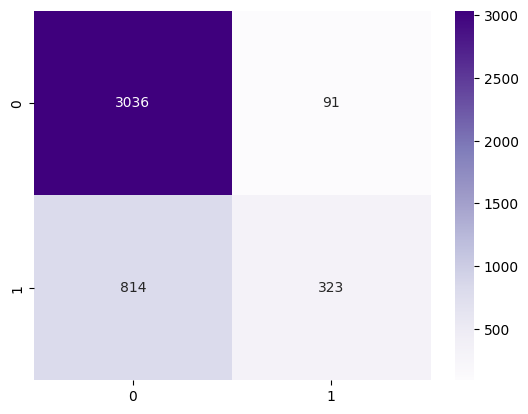

In [116]:
# Display the visual of confusion matrix
sns.heatmap(cfm, annot=True, fmt='d', cmap='Purples')

END

---